In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pylab as plt

from sklearn.linear_model import Ridge

In [2]:
plt.style.use('bmh')

In [3]:
df_test = pd.read_csv('./test.csv')
df_ex = pd.read_csv('./sample_submission.csv')
df_train = pd.read_csv('./sales_train.csv')
df_shop = pd.read_csv('./shops.csv')
df_items = pd.read_csv('./items.csv')
df_cat = pd.read_csv('./item_categories.csv')

In [4]:
df_train_a = pd.merge(df_train, df_items, on='item_id')
df_train_a = pd.merge(df_train_a, df_cat, on='item_category_id')
df_train_a = pd.merge(df_train_a, df_shop, on='shop_id')
df_train_a['full_price'] = df_train_a['item_price']*df_train_a['item_cnt_day']

In [5]:
mgroups = df_train_a.groupby('date_block_num')
mitems = list()
for g in list(mgroups.groups):
    mitems.append(mgroups.get_group(g).groupby('item_name')['item_cnt_day'].sum())

In [6]:
df_mitems = pd.DataFrame()
for i in range(len(mitems)):
    df_mitems[i] = mitems[i]
df_mitems = df_mitems.fillna(value=0.0)
#df_mitems = df_mitems.transpose()
df_mitems.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
item_name,,,,,,,,,,,,,,,,,,,,,
/ЗОЛОТАЯ КОЛЛЕКЦИЯ м/ф-72,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"007 Legends [PS3, русская версия]",7.0,3.0,4.0,1.0,2.0,2.0,3.0,1.0,1.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"007 Legends [PС, Jewel, русская версия]",8.0,8.0,7.0,6.0,4.0,4.0,7.0,13.0,7.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"007 Legends [Xbox 360, русская версия]",4.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1+1,299.0,208.0,178.0,97.0,66.0,79.0,87.0,72.0,59.0,58.0,...,42.0,32.0,40.0,20.0,20.0,26.0,21.0,30.0,19.0,22.0


In [7]:
df_mitems_a = pd.merge(df_mitems, df_train_a, how='left', on='item_name')
df_mitems_a = df_mitems_a.drop(columns=['date', 'date_block_num', 'item_price', 'item_cnt_day', 'full_price'])
df_mitems_a = df_mitems_a.drop_duplicates(subset='item_name')
df_mitems_a.head()

,item_name,0,1,2,3,4,5,6,7,8,...,29,30,31,32,33,shop_id,item_id,item_category_id,item_category_name,shop_name
0,/ЗОЛОТАЯ КОЛЛЕКЦИЯ м/ф-72,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,25,19,40,Кино - DVD,"Москва ТРК ""Атриум"""
1,"007 Legends [PS3, русская версия]",7.0,3.0,4.0,1.0,2.0,2.0,3.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,24,27,19,Игры - PS3,"Москва ТК ""Буденовский"" (пав.К7)"
43,"007 Legends [PС, Jewel, русская версия]",8.0,8.0,7.0,6.0,4.0,4.0,7.0,13.0,7.0,...,0.0,0.0,0.0,0.0,0.0,59,28,30,Игры PC - Стандартные издания,"Ярославль ТЦ ""Альтаир"""
129,"007 Legends [Xbox 360, русская версия]",4.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6,29,23,Игры - XBOX 360,"Воронеж (Плехановская, 13)"
143,1+1,299.0,208.0,178.0,97.0,66.0,79.0,87.0,72.0,59.0,...,26.0,21.0,30.0,19.0,22.0,59,32,40,Кино - DVD,"Ярославль ТЦ ""Альтаир"""


In [8]:
df_train_a.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name,full_price
0,02.01.2013,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",999.0
1,26.04.2013,3,59,944,150.0,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",150.0
2,26.06.2013,5,59,944,199.5,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",199.5
3,20.07.2013,6,59,944,199.5,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",199.5
4,14.09.2013,8,59,944,299.0,2.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",598.0


In [9]:
price = df_train_a[(df_train_a['shop_id']==12) & (df_train_a['item_id']==3731)]
price.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name,full_price
2676417,30.04.2015,27,12,3731,1999.0,2.0,"Grand Theft Auto V [PC, русские субтитры]",30,Игры PC - Стандартные издания,Интернет-магазин ЧС,3998.0
2676418,29.04.2015,27,12,3731,1999.0,3.0,"Grand Theft Auto V [PC, русские субтитры]",30,Игры PC - Стандартные издания,Интернет-магазин ЧС,5997.0
2676419,28.04.2015,27,12,3731,1959.0,5.0,"Grand Theft Auto V [PC, русские субтитры]",30,Игры PC - Стандартные издания,Интернет-магазин ЧС,9795.0
2676420,27.04.2015,27,12,3731,1999.0,17.0,"Grand Theft Auto V [PC, русские субтитры]",30,Игры PC - Стандартные издания,Интернет-магазин ЧС,33983.0
2676421,24.04.2015,27,12,3731,1999.0,4.0,"Grand Theft Auto V [PC, русские субтитры]",30,Игры PC - Стандартные издания,Интернет-магазин ЧС,7996.0


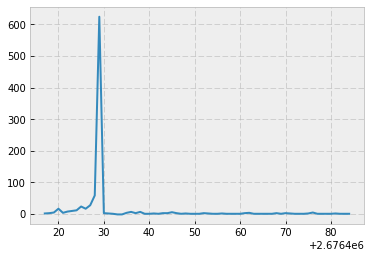

In [10]:
price['item_cnt_day'].plot(kind='line')

In [11]:
grouped = df_train_a.groupby(['item_id', 'shop_id', 'date_block_num'])

In [12]:
prices = grouped['item_cnt_day'].sum()

In [13]:
X = np.array([*prices.index.values])
Y = np.array(prices.values)

In [14]:
X[:,2]

array([20, 15, 18, ...,  1,  2, 14])

In [15]:
df_train_shr = pd.DataFrame({'date_block_num':X[:,2], 'item_id':X[:,0], 'shop_id':X[:,1], 'item_cnt_m':Y})

In [16]:
df_train_shr.head()

,date_block_num,item_cnt_m,item_id,shop_id
0,20,1.0,0,54
1,15,2.0,1,55
2,18,1.0,1,55
3,19,1.0,1,55
4,20,1.0,1,55


In [17]:
df_train_shr.nlargest(5, columns='item_cnt_m')

,date_block_num,item_cnt_m,item_id,shop_id
865483,33,2253.0,11373,12
729445,32,1644.0,9248,12
729452,32,1644.0,9249,55
1539008,11,1305.0,20949,31
281180,27,1242.0,3730,55


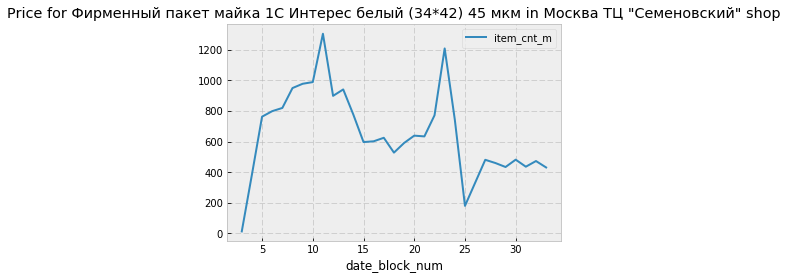

In [18]:
item_id = 20949
shop_id = 31
item_name = df_items.iloc[item_id]['item_name']
shop_name = df_shop.iloc[shop_id]['shop_name']

price = df_train_shr[(df_train_shr['item_id']==item_id) & (df_train_shr['shop_id']==shop_id)]
price.plot(x='date_block_num', y='item_cnt_m', title='Price for {} in {} shop'.format(item_name, shop_name))
plt.show()

In [19]:
def plot_sales(item_id, shop_id):
    item_name = df_items.iloc[item_id]['item_name']
    cat = df_items.iloc[item_id]['item_category_id']
    shop_name = df_shop.iloc[shop_id]['shop_name']
    
    print('category: {}'.format(str(df_cat.iloc[cat]['item_category_name'])))
    price = df_train_shr[(df_train_shr['shop_id']==shop_id) & (df_train_shr['item_id']==item_id)]
    if len(price) == 0:
        return False
    price.plot(x='date_block_num', y='item_cnt_m', kind='bar', title='Price for {} in {} shop'.format(item_name, shop_name))

In [20]:
df_test.head(10)

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
5,5,5,5039
6,6,5,5041
7,7,5,5046
8,8,5,5319
9,9,5,5003


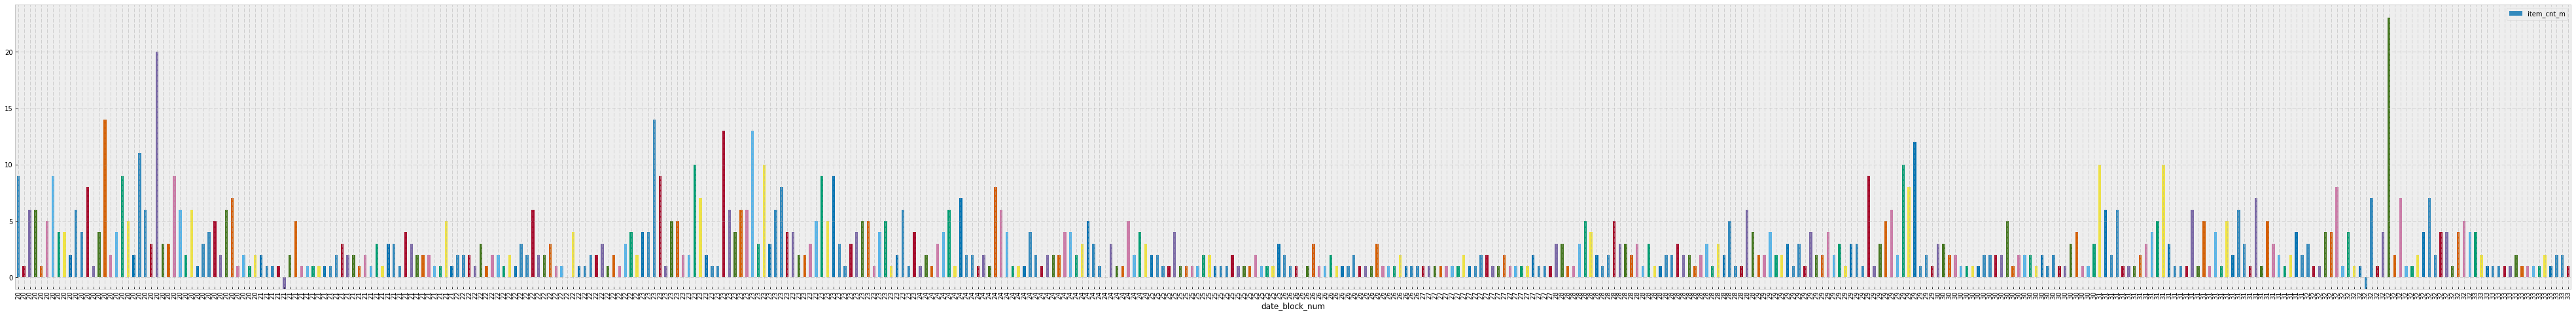

In [21]:
gprices = df_train_shr[(df_train_shr['item_id']==5037)]
gprices = gprices.sort_values(by='date_block_num')
gprices.plot(kind='bar', x='date_block_num', y='item_cnt_m', figsize=(70,8))

In [22]:
mean_prices = df_train_shr[(df_train_shr['item_id']==5037)].groupby('date_block_num')['item_cnt_m'].mean()

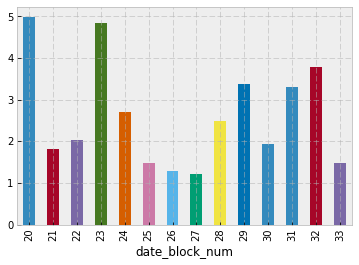

In [23]:
mean_prices.plot(kind='bar')
plt.show()

### Lets study how sell of one item variate in different shops

In [26]:
item_id = 20949
df_items.iloc[item_id]['item_name']

'Фирменный пакет майка 1С Интерес белый (34*42) 45 мкм'

### In which shops there is that good?

In [30]:
shop_series = df_train_shr.groupby('item_id').get_group(item_id)['shop_id']

In [32]:
shop_list = shop_series.unique()

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


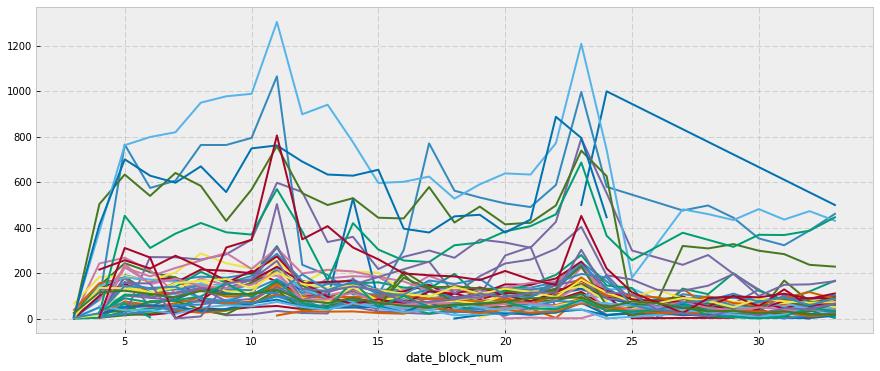

In [81]:
fig, ax = plt.subplots(figsize=(15,6))

mean_prices = df_train_shr[(df_train_shr['item_id']==item_id)].groupby('date_block_num')['item_cnt_m'].mean()
mean_prices.plot(label='mean', ax=ax, legend=False)
for shop in shop_list:
    prices = df_train_shr[(df_train_shr['item_id']==item_id) & (df_train_shr['shop_id']==shop)]
    prices.plot(x='date_block_num', y='item_cnt_m', ax=ax, legend=False)
fig.show()
fig.show()